<a href="https://colab.research.google.com/github/nidhin-koshy/Notebooks/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

The obective in a classification task is to assign class labels to input samples. Prior to the classification task, we train the classifier using training samples, where input samples and it's corresponding labels are provided. 

##System Model

 Let $(x_i,y_i)$ denote  the $i$th training sample, class label pair where $x_i $ denotes the training sample and $y_i$ denotes the class label. $x_i$ can be a feature vector and $y_i$ can take one among the finite class labels.
 
 ### Binary Classification
 When $y_i$ takes only two values, we denote the classification task as binary classification.
 
 ### Linear Classifiers
 
 Classifiers of the form 
 
 $$\hat{y} = \begin{cases} 1 & \text{if h(w,x) > 0} \\ 0 & otherwise \end{cases} ,$$ where $h(w,x) = w^Tx + b$ is an affine function of the input sample $x$.
 
 ### Logistic Regression
 
 Logistic regression is a linear classifier. Logistic regression can be viewed as a maximum likelihood estimator under specific assumptions. 

Given the parameters of the logistic function $w$, let the likelihood of the class label $Y$ given the input variable $X = x$ be modelled as the logistic function
$$P(Y = 1 | X = x) = \frac{1}{1+e^{-w^Tx}}.$$

Then, given the parameters of the logistic function $w$, the likelihood for a given training sample can be written as
$$P(Y=y_i | X=x_i) =  \left(\frac{1}{1+e^{-w^Tx_i}}\right)^{y_i} \left(\frac{e^{-w^Tx_i}}{1+e^{-w^Tx_i}}\right)^{1-y_i}.$$

The log-likelihood of the entire training samples can then be written as

 \begin{align} \nonumber L(w) &= \sum_{i=1}^n y_i \log \left(\frac{1}{1+e^{-w^Tx_i}}\right) + (1-y_i) \log \left(\frac{e^{-w^Tx_i}}{1+e^{-w^Tx_i}}\right)\\
& = \sum_{i=1}^n y_i w^Tx_i+\log \left(\frac{1}{1+e^{w^Tx_i}}\right).
\end{align}

The obective of the training in logistic regression is to obtain the parameter $w^*$ that maximizes the likelihood, i.e.,

$$w^* = \arg \max_w L(w).$$

There is no closed form expression for the optimum $w^*$. However, given that the objective function is convex in the optimization variable $w$, one can employ convex optimization techniques to obtain $w^*$. Particularly, we can use gradient descent based techniques to find $w^*$. The gradient of the objective function with respect to $w$ can be derived to be

\begin{align}
\nabla_{w}L(w) = \sum_{i=1}^n y_i x_i -  \left(\frac{1}{1+e^{-w^Tx_i}}\right)x_i.
\end{align}



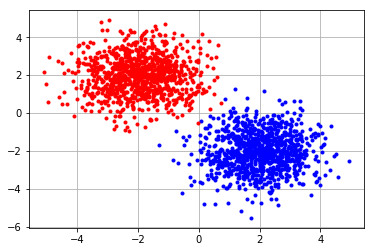

In [13]:
num_x1_samples = 1000
num_x2_samples = 1000

mu_1 = np.array([[2,-2]]).T
mu_2 = np.array([[-2,2]]).T

x1 = np.random.randn(num_x1_samples,2) + mu_1.T
y1 = np.ones((num_x1_samples,1))

x2 = np.random.randn(num_x2_samples,2) + mu_2.T
y2 = np.zeros((num_x2_samples,1))

x_train = np.concatenate((x1,x2),axis=0)
x_train = np.concatenate((x_train,np.ones((x_train[:,0].size,1))),axis=1)
y_train = np.concatenate((y1,y2),axis=0)

plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.grid()
plt.show()


In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D






Converged w* =  [[ 2.01635616 -2.18457201 -0.38726292]]


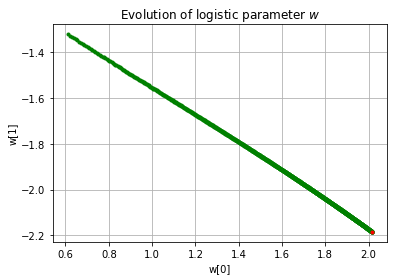

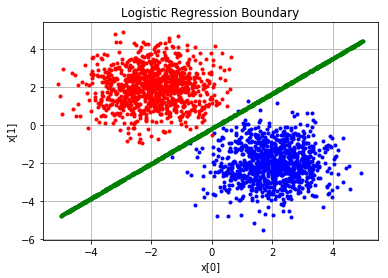

In [15]:
def get_grad(x,y,w):
  wT_x = np.matmul(x,w)
  temp = 1/(1+np.exp(-wT_x))
  grad = np.matmul(x.T,y)-np.matmul(x.T,temp)
  
  grad = grad/(y.size)
  return grad


num_iter = 1000
w = np.random.randn(x_train[0,:].size,1)
w_evol = w
mu= 0.1
for iter_count in range(num_iter):
    grad = get_grad(x_train,y_train,w)
    w = w+mu*grad
    w_evol = np.concatenate((w_evol,w),axis=1)
    
print("Converged w* = ", w.T)
x1_plot = 10*np.random.rand(1000,1)-5
x2_plot = -(x1_plot*w[0,0]+w[2,0])/w[1,0]

plt.figure()
plt.plot(w_evol[0,:],w_evol[1,:],'.g')
plt.plot(w_evol[0,-1:],w_evol[1,-1:],'.r')
plt.title("Evolution of logistic parameter " r"$w$")
plt.xlabel("w[0]")
plt.ylabel("w[1]")
plt.grid()
plt.show()

plt.figure()
plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.plot(x1_plot,x2_plot,'.g')
plt.title("Logistic Regression Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression parameters from sklearn =  [[ 2.81152331 -2.7546567  -0.19553111]]


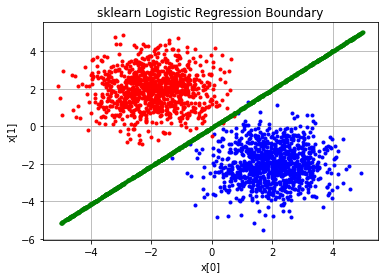

In [16]:
#Logistic Regression using sklearn in-built implementation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train[:,0:2],y_train[:,0]) #y_train[:,0] used only because fit() expects the labels to be a 1d array and not a column vector.
w_sklearn = np.array([np.append(log_reg.coef_,log_reg.intercept_)])

print("Logistic Regression parameters from sklearn = ", w_sklearn)


#x1_plot = 10*np.random.rand(1000,1)-5
x2_plot = -(x1_plot*w_sklearn.T[0,0]+w_sklearn.T[2,0])/w_sklearn.T[1,0]

plt.figure()
plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.plot(x1_plot,x2_plot,'.g')
plt.title("sklearn Logistic Regression Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

### Perceptron

Perceptron is a simple linear classifier based on a very simple neural network model. Perceptron classifier can be modelled as
\begin{align}
\nonumber y &= sign(w^Tx)\\
\nonumber & = sign\left(\sum_{k=1}^K w_kx_k\right),
\end{align}
where $sign(x) = 1$ if $x >0$ and $sign(x) = -1$ if $x \le 0$.

#### Training a perceptron
Perceptron training is done on a sample by sample basis. Whenever the current model encounters an error, the perceptron weights are updated. The weight updation rule in perceptron training for training sample $(x_i,y_i)$ is given by

\begin{align}
\nonumber w = w + \nabla_w,
\end{align}
where 

\begin{align}
\nabla_w = \begin{cases} &2 \eta y_i x_i & \text{if }  {y_i \ne sign(w^Tx_i)} \\ 
& 0 & \text{otherwise}
\end{cases},
\end{align}
where $\eta$ is the learning rate. 

Perceptron weights =  [[ 0.08072391 -0.07466261 -0.0026203 ]]


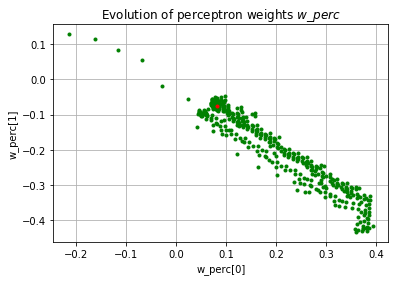

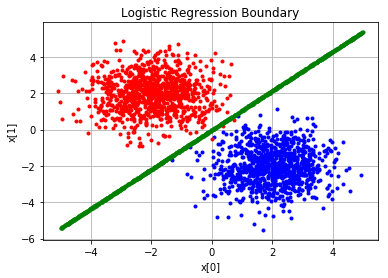

In [29]:
#Perceptron training
#Shuffle training samples. In the logistic regression example, the samples where not randomized
perm = np.random.permutation(y_train.size)

x_train_1 = x_train[perm,:]
y_train_1 = y_train[perm,:]
y_train_1 = 2*y_train_1-1 # relabel zeros by -1


w_perc = np.random.randn(x_train[0,:].size,1)
w_perc_evol = w_perc
eta = 0.01

num_outer_loop = 100
for count_outer_loop in range(num_outer_loop):
  for count_inner in range(y_train.size):
    if (y_train_1[count_inner,0]*np.matmul(x_train_1[count_inner,:],w_perc)) < 0:
      w_perc = w_perc + (2*eta*y_train_1[count_inner,0])*x_train_1[count_inner:count_inner+1,:].T
      w_perc_evol = np.concatenate((w_perc_evol,w_perc),axis=1)
      
print("Perceptron weights = ", w_perc.T)

x2_plot = -(x1_plot*w_perc[0,0]+w_perc[2,0])/w_perc[1,0]
plt.figure()
plt.plot(w_perc_evol[0,:],w_perc_evol[1,:],'.g')
plt.plot(w_perc_evol[0,-1:],w_perc_evol[1,-1:],'.r')
plt.title("Evolution of perceptron weights " r"$w\_perc$")
plt.xlabel("w_perc[0]")
plt.ylabel("w_perc[1]")
plt.grid()
plt.show()

plt.figure()
plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.plot(x1_plot,x2_plot,'.g')
plt.title("Logistic Regression Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

    
    